# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from g_config import gcode
from w_config import wcode

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
# This is just a test of variables to use in the dataframe

city_name = 'houston'
url = f'http://api.openweathermap.org/data/2.5/weather?q={city_name}&units=metric&appid={wcode}'
response = requests.get(url)
data_val = response.json()
pprint(data_val)

print(f"Latitude: {data_val['coord']['lat']}")
print(f"Longitude: {data_val['coord']['lon']}")
print(f"Max temp: {data_val['main']['temp_max']}")
print(f"Humidity: {data_val['main']['humidity']}")
print(f"Cloudiness: {data_val['clouds']['all']}")
print(f"Wind speed: {data_val['wind']['speed']}")
print(f"Country: {data_val['sys']['country']}")
print(f"Date: {data_val['dt']}")


{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 29.7633, 'lon': -95.3633},
 'dt': 1613246329,
 'id': 4699066,
 'main': {'feels_like': -2.28,
          'humidity': 75,
          'pressure': 1018,
          'temp': 3.39,
          'temp_max': 4.44,
          'temp_min': 2.22},
 'name': 'Houston',
 'sys': {'country': 'US',
         'id': 4850,
         'sunrise': 1613221358,
         'sunset': 1613261334,
         'type': 1},
 'timezone': -21600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 350, 'gust': 11.32, 'speed': 5.14}}
Latitude: 29.7633
Longitude: -95.3633
Max temp: 4.44
Humidity: 75
Cloudiness: 90
Wind speed: 5.14
Country: US
Date: 1613246329


In [25]:
print('Checking available cities')
print('----------------------------')
number = 0
city_n =[]
lat =[]
lon =[]
max_temp =[]
humidity =[]
cloudiness =[]
w_speed =[]
country =[]
date =[]

for city in cities[0:50]:
    
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&units=metric&appid={wcode}'
    response = requests.get(url)
    data_val = response.json()
    
    if str(response) == '<Response [404]>':
        print(f'City not found. Skipping to next recording')
    else:
        number+=1
        print(f'Recording No. {number}: {city}') 
        city_n.append(city)
        lat.append(data_val['coord']['lat'])
        lon.append(data_val['coord']['lon'])
        max_temp.append(data_val['main']['temp_max'])
        humidity.append(data_val['main']['humidity'])
        cloudiness.append(data_val['clouds']['all'])
        w_speed.append(data_val['wind']['speed'])
        country.append(data_val['sys']['country'])
        date.append(data_val['dt'])

print('----------------------------')        
print('Data retrieval complete')
    

Checking available cities
----------------------------
City not found. Skipping to next recording
Recording No. 1: samarai
Recording No. 2: bethel
Recording No. 3: morro bay
Recording No. 4: ribeira grande
Recording No. 5: esperance
Recording No. 6: biak
Recording No. 7: kapaa
Recording No. 8: cherskiy
Recording No. 9: karachi
Recording No. 10: albany
Recording No. 11: gorontalo
City not found. Skipping to next recording
City not found. Skipping to next recording
Recording No. 12: tiksi
Recording No. 13: san jose
Recording No. 14: suez
Recording No. 15: leshukonskoye
Recording No. 16: saint-pierre
City not found. Skipping to next recording
Recording No. 17: jamestown
Recording No. 18: aksu
Recording No. 19: busselton
Recording No. 20: hermanus
Recording No. 21: khatanga
Recording No. 22: east london
Recording No. 23: belaya kholunitsa
Recording No. 24: tual
Recording No. 25: castro
Recording No. 26: mataura
Recording No. 27: fare
Recording No. 28: rikitea
Recording No. 29: ushuaia
Reco

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
df_cities = pd.DataFrame({'City':city_n, 'Latitude':lat, 'Longitude':lon,
                          'Max temp':max_temp, 'Humidity':humidity, 'Cloudiness':cloudiness, 
                          'Wind speed':w_speed, 'Country':country, 'Date':date})
display(df_cities.head())

,City,Latitude,Longitude,Max temp,Humidity,Cloudiness,Wind speed,Country,Date
0,samarai,-10.6167,150.6667,27.42,70,27,2.61,PG,1613246773
1,bethel,41.3712,-73.4140,-2.00,31,90,2.06,US,1613246633
2,morro bay,35.3658,-120.8499,15.00,84,97,3.13,US,1613246773
3,ribeira grande,38.5167,-28.7000,14.00,77,75,10.29,PT,1613246774
4,esperance,-33.8667,121.9000,15.00,88,16,2.57,AU,1613246577


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [28]:
df_cities.describe() # No cities with humidity >100%

,Latitude,Longitude,Max temp,Humidity,Cloudiness,Wind speed,Date
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,4.500000e+01
mean,6.878816,18.636618,12.246889,76.844444,57.644444,3.751778,1.613247e+09
std,38.293840,108.238657,17.234041,14.088931,40.009178,2.354641,8.914854e+01
min,-54.800000,-175.200000,-34.940000,30.000000,0.000000,0.240000,1.613246e+09
25%,-23.120300,-73.414000,4.000000,73.000000,16.000000,2.460000,1.613247e+09
50%,-2.022600,37.976300,16.110000,79.000000,75.000000,3.590000,1.613247e+09
75%,41.123100,121.900000,26.050000,87.000000,96.000000,4.970000,1.613247e+09
max,71.966700,168.864300,28.810000,94.000000,100.000000,10.290000,1.613247e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [29]:
df_cities.head()

,City,Latitude,Longitude,Max temp,Humidity,Cloudiness,Wind speed,Country,Date
0,samarai,-10.6167,150.6667,27.42,70,27,2.61,PG,1613246773
1,bethel,41.3712,-73.4140,-2.00,31,90,2.06,US,1613246633
2,morro bay,35.3658,-120.8499,15.00,84,97,3.13,US,1613246773
3,ribeira grande,38.5167,-28.7000,14.00,77,75,10.29,PT,1613246774
4,esperance,-33.8667,121.9000,15.00,88,16,2.57,AU,1613246577


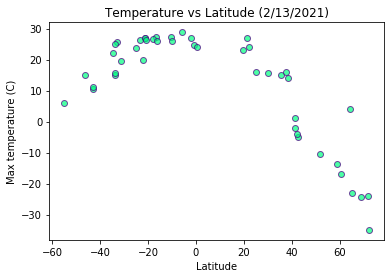

In [110]:
x_values = df_cities['Latitude']
y_values = df_cities['Max temp']
plt.scatter(x_values, y_values, color='springgreen', alpha=0.70, edgecolors='indigo')
plt.xlabel('Latitude')
plt.ylabel('Max temperature (C)')
plt.title('Temperature vs Latitude (2/13/2021)')
plt.show()

## Latitude vs. Humidity Plot

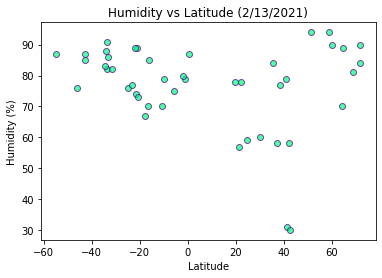

In [111]:
x_values = df_cities['Latitude']
y_values = df_cities['Humidity']
plt.scatter(x_values, y_values, color='springgreen', alpha=0.70, edgecolors='indigo')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs Latitude (2/13/2021)')
plt.show()

## Latitude vs. Cloudiness Plot

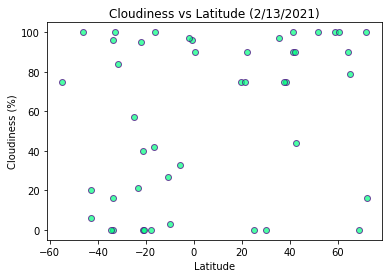

In [112]:
x_values = df_cities['Latitude']
y_values = df_cities['Cloudiness']
plt.scatter(x_values, y_values, color='springgreen', alpha=0.70, edgecolors='indigo')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs Latitude (2/13/2021)')
plt.show()

## Latitude vs. Wind Speed Plot

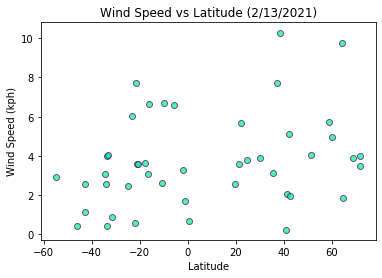

In [113]:
x_values = df_cities['Latitude']
y_values = df_cities['Wind speed']
plt.scatter(x_values, y_values, color='springgreen', alpha=0.70, edgecolors='indigo')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (kph)')
plt.title('Wind Speed vs Latitude (2/13/2021)')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [81]:
# Defyning data frame of North cities

north_cities = df_cities[df_cities['Latitude']>0]
north_cities.head()

,City,Latitude,Longitude,Max temp,Humidity,Cloudiness,Wind speed,Country,Date
1,bethel,41.3712,-73.4140,-2.00,31,90,2.06,US,1613246633
2,morro bay,35.3658,-120.8499,15.00,84,97,3.13,US,1613246773
3,ribeira grande,38.5167,-28.7000,14.00,77,75,10.29,PT,1613246774
6,kapaa,22.0752,-159.3190,24.00,78,90,5.66,US,1613246775
7,cherskiy,68.7500,161.3000,-24.31,81,0,3.90,RU,1613246775


The r value is -0.9076


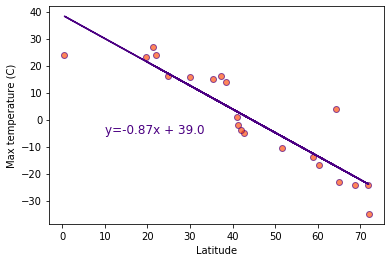

In [88]:
# Creating the regression

x_values = north_cities['Latitude']
y_values = north_cities['Max temp']
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values*slope + intercept 
line_eq = f'y={str(round(slope,2))}x + {str(round(intercept))}'
plt.scatter(x_values, y_values, color='orangered', alpha=0.65, edgecolors='indigo')
plt.plot(x_values, regress_values, "indigo")
plt.annotate(line_eq,(10,-5),fontsize=12,color="indigo")
plt.xlabel('Latitude')
plt.ylabel('Max temperature (C)')
plt.title('Max Temperature vs Latitude in Northern Hemisphere')
print(f'The r value is {round(rvalue,4)}')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [90]:
south_cities = df_cities[df_cities['Latitude']<0]
south_cities.head()

,City,Latitude,Longitude,Max temp,Humidity,Cloudiness,Wind speed,Country,Date
0,samarai,-10.6167,150.6667,27.42,70,27,2.61,PG,1613246773
4,esperance,-33.8667,121.9000,15.00,88,16,2.57,AU,1613246577
5,biak,-0.9131,122.8766,24.73,79,96,1.70,ID,1613246775
15,saint-pierre,-21.3393,55.4781,27.00,74,0,7.72,RE,1613246779
18,busselton,-33.6500,115.3333,15.56,82,0,4.02,AU,1613246780


The r value is 0.8242


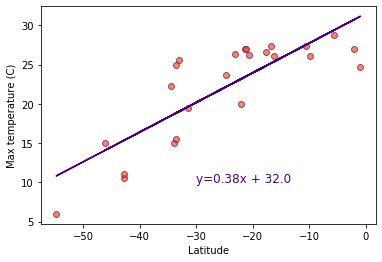

In [92]:
x_values = south_cities['Latitude']
y_values = south_cities['Max temp']
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values*slope + intercept 
line_eq = f'y={str(round(slope,2))}x + {str(round(intercept))}'
plt.scatter(x_values, y_values, color='orangered', alpha=0.65, edgecolors='indigo')
plt.plot(x_values, regress_values, "indigo")
plt.annotate(line_eq,(-30,10),fontsize=12,color="indigo")
plt.xlabel('Latitude')
plt.ylabel('Max temperature (C)')
plt.title('Max Temperature vs Latitude in Southern Hemisphere')
print(f'The r value is {round(rvalue,4)}')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is 0.2891


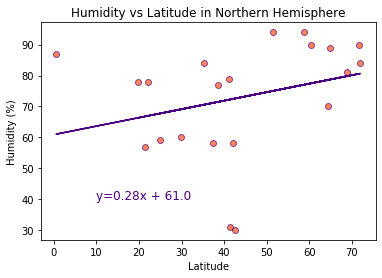

In [95]:
x_values = north_cities['Latitude']
y_values = north_cities['Humidity']
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values*slope + intercept 
line_eq = f'y={str(round(slope,2))}x + {str(round(intercept))}'
plt.scatter(x_values, y_values, color='orangered', alpha=0.65, edgecolors='indigo')
plt.plot(x_values, regress_values, "indigo")
plt.annotate(line_eq,(10,40),fontsize=12,color="indigo")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs Latitude in Northern Hemisphere')
print(f'The r value is {round(rvalue,4)}')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is -0.4629


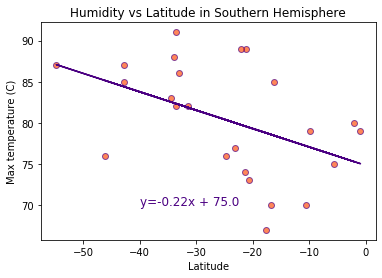

In [99]:
x_values = south_cities['Latitude']
y_values = south_cities['Humidity']
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values*slope + intercept 
line_eq = f'y={str(round(slope,2))}x + {str(round(intercept))}'
plt.scatter(x_values, y_values, color='orangered', alpha=0.65, edgecolors='indigo')
plt.plot(x_values, regress_values, "indigo")
plt.annotate(line_eq,(-40,70),fontsize=12,color="indigo")
plt.xlabel('Latitude')
plt.ylabel('Max temperature (C)')
plt.title('Humidity vs Latitude in Southern Hemisphere')
print(f'The r value is {round(rvalue,4)}')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is -0.0218


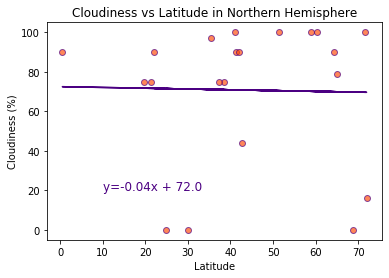

In [101]:
x_values = north_cities['Latitude']
y_values = north_cities['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values*slope + intercept 
line_eq = f'y={str(round(slope,2))}x + {str(round(intercept))}'
plt.scatter(x_values, y_values, color='orangered', alpha=0.65, edgecolors='indigo')
plt.plot(x_values, regress_values, "indigo")
plt.annotate(line_eq,(10,20),fontsize=12,color="indigo")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs Latitude in Northern Hemisphere')
print(f'The r value is {round(rvalue,4)}')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is -0.4629


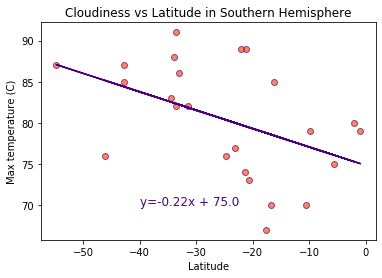

In [103]:
x_values = south_cities['Latitude']
y_values = south_cities['Humidity']
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values*slope + intercept 
line_eq = f'y={str(round(slope,2))}x + {str(round(intercept))}'
plt.scatter(x_values, y_values, color='orangered', alpha=0.65, edgecolors='indigo')
plt.plot(x_values, regress_values, "indigo")
plt.annotate(line_eq,(-40,70),fontsize=12,color="indigo")
plt.xlabel('Latitude')
plt.ylabel('Max temperature (C)')
plt.title('Cloudiness vs Latitude in Southern Hemisphere')
print(f'The r value is {round(rvalue,4)}')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is 0.2163


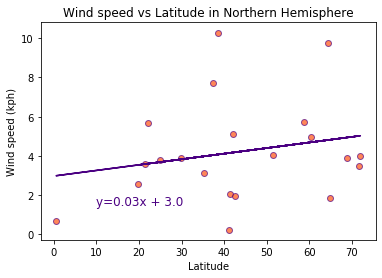

In [106]:
x_values = north_cities['Latitude']
y_values = north_cities['Wind speed']
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values*slope + intercept 
line_eq = f'y={str(round(slope,2))}x + {str(round(intercept))}'
plt.scatter(x_values, y_values, color='orangered', alpha=0.65, edgecolors='indigo')
plt.plot(x_values, regress_values, "indigo")
plt.annotate(line_eq,(10,1.5),fontsize=12,color="indigo")
plt.xlabel('Latitude')
plt.ylabel('Wind speed (kph)')
plt.title('Wind speed vs Latitude in Northern Hemisphere')
print(f'The r value is {round(rvalue,4)}')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is -0.4629


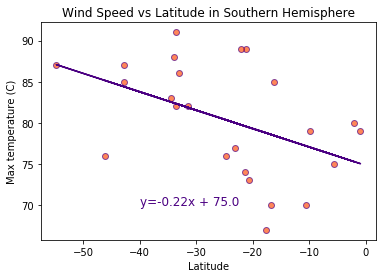

In [108]:
x_values = south_cities['Latitude']
y_values = south_cities['Humidity']
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values*slope + intercept 
line_eq = f'y={str(round(slope,2))}x + {str(round(intercept))}'
plt.scatter(x_values, y_values, color='orangered', alpha=0.65, edgecolors='indigo')
plt.plot(x_values, regress_values, "indigo")
plt.annotate(line_eq,(-40,70),fontsize=12,color="indigo")
plt.xlabel('Latitude')
plt.ylabel('Max temperature (C)')
plt.title('Wind Speed vs Latitude in Southern Hemisphere')
print(f'The r value is {round(rvalue,4)}')
plt.show()